In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

plt.style.use("classic")

In [3]:
import os
import tarfile
import urllib

#1 데이터 다운로드
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_Data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH) :
    os.makedirs(housing_path, exist_ok = True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [5]:
import pandas as pd

def load_housing_data(housing_path = HOUSING_PATH) :
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [6]:
housing = load_housing_data(HOUSING_PATH)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


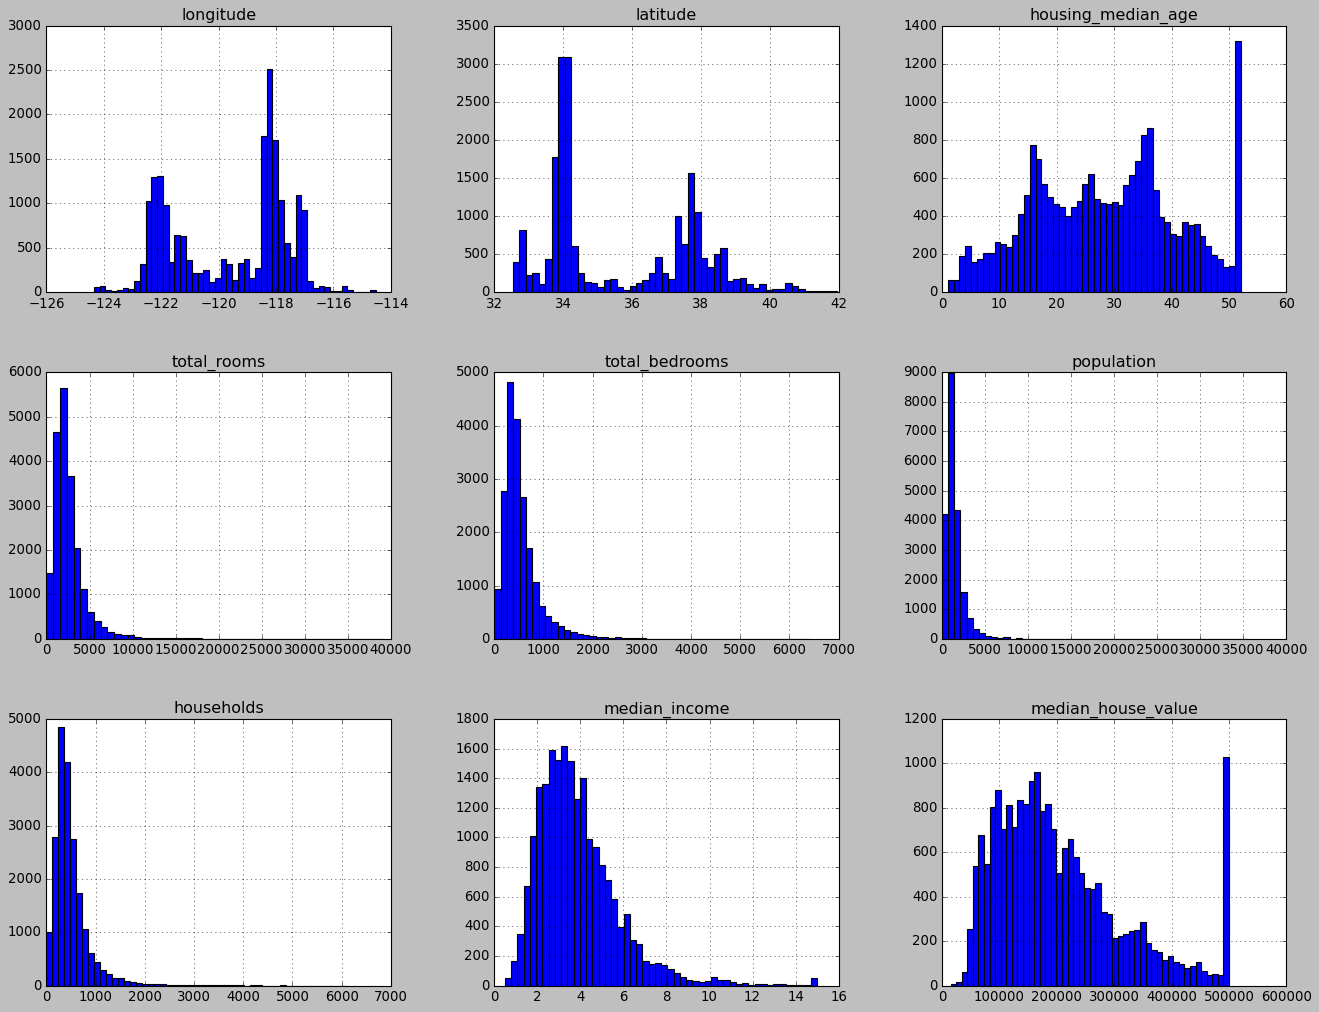

In [10]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, random_state=42, test_size=0.2)

<AxesSubplot:>

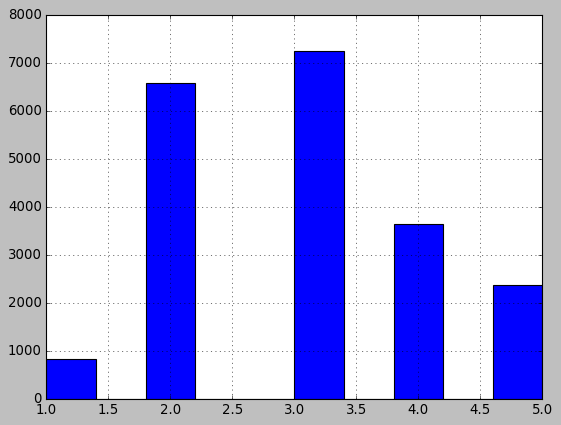

In [12]:
#2 계층별 샘플링

housing["income_cat"] = pd.cut(housing['median_income'], bins = [0, 1.5, 3., 4.5, 6., np.inf],
                               labels = [1,2,3,4,5])
housing['income_cat'].hist()



In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# for 문을 하나만 도는데 for 문을 왜쓰는 걸까. 
for train_index, test_index in split.split(housing, housing['income_cat']) :
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

계층별 샘플링이 잘 이루어졌는지 확인

In [14]:
housing['income_cat'].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [15]:
strat_train_set['income_cat'].value_counts() / len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

In [16]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [17]:
# 계층별 샘플링이 적절하게 이루어졌으므로 income_cat feature 삭제

for set_ in (strat_train_set, strat_test_set) :
    set_.drop('income_cat', axis=1, inplace=True)

In [18]:
#3 훈련 데이터가 손상되는일이 없도록 시각화를 위한 데이터 카피
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

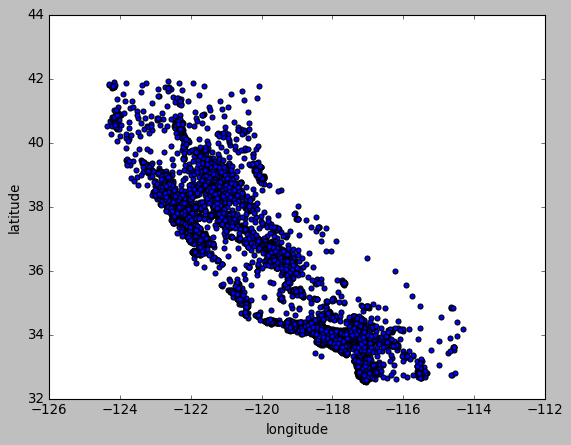

In [19]:
#산점도
housing.plot(kind="scatter", x='longitude', y='latitude')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

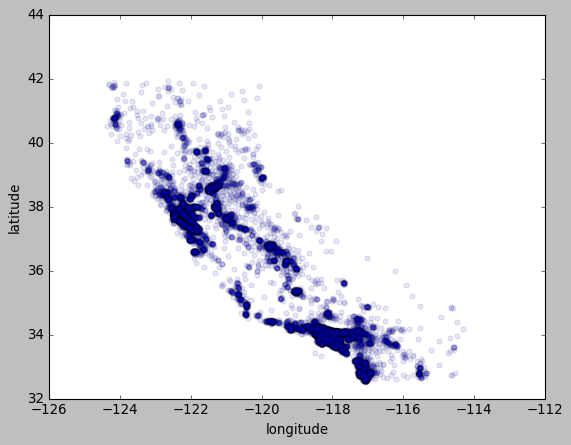

In [20]:
# 분포를 알기위해 투명도 조절
housing.plot(kind="scatter", x='longitude', y='latitude', alpha=0.1)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

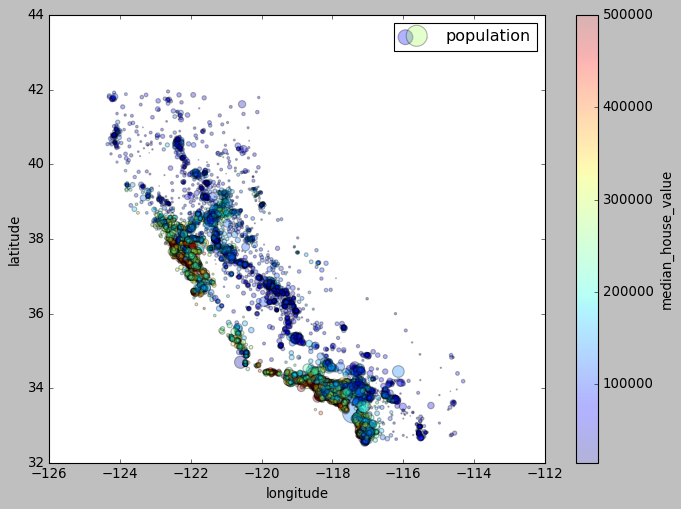

In [21]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.3,
             s=housing["population"]/100, label='population', figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"))

In [22]:
# 상관관계 메트릭스 생성
corr_matrix = housing.drop("ocean_proximity", axis=1).corr()

In [23]:
# 주택 중간 가격과 다른 특성간의 상관관계 파악
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

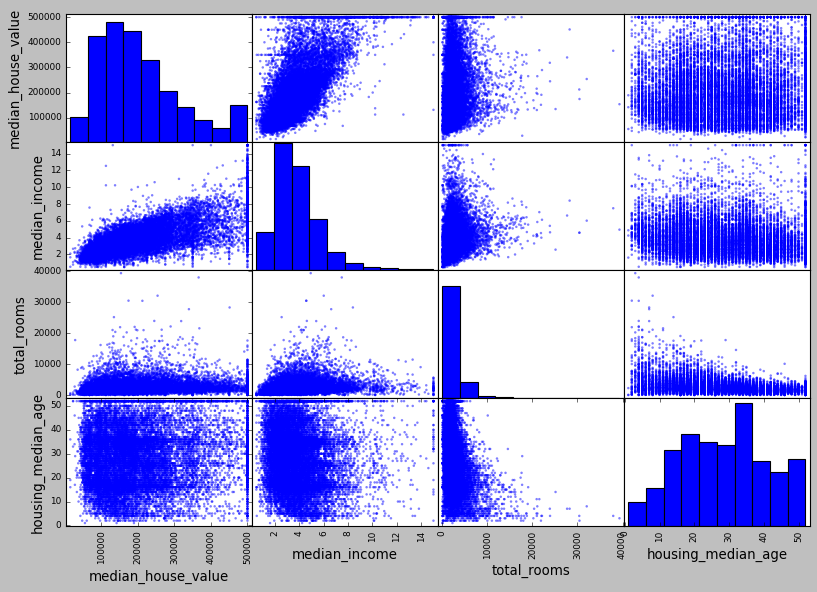

In [24]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", 
              "housing_median_age"]

scatter_matrix(housing[attributes], figsize=(12,8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

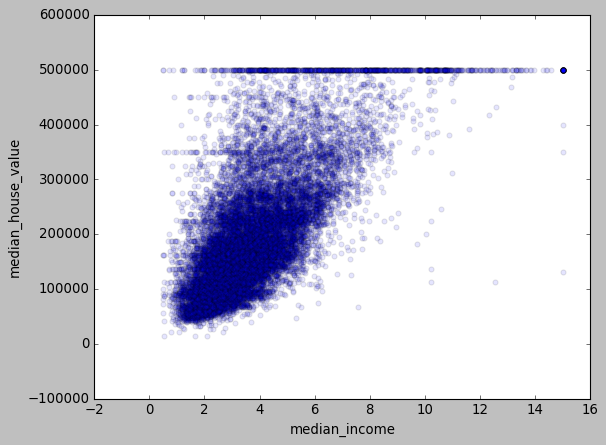

In [25]:
# 중간 주택 가격과 중간 소득 간의 연관관계 집중
housing.plot(kind="scatter", x='median_income', y='median_house_value', alpha=0.1)

In [26]:
# 특정 구역 방 개수보단 가구 당 방 개수가 더 유용한 특성일 것
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
# 전체 침실 개수 보단 한 방 개수당 침실 개수 더 유용한 특성일 것
housing['bedrooms_per_rooms'] = housing['total_bedrooms'] / housing['total_rooms']

# 가구당 인원 수도 한번 구해보자
housing['population_per_household'] = housing['population'] / housing['households']

In [27]:
corr_matrix = housing.drop("ocean_proximity", axis=1).corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_rooms         -0.259952
Name: median_house_value, dtype: float64

In [28]:
#4 머신러닝 알고리즘을 위한 데이터 준비

# feature 와 label 분류
housing = strat_train_set.drop("median_house_value", axis=1) # 새로운 객체
housing_labels = strat_train_set['median_house_value'].copy()

In [29]:
# null 값 확인
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [30]:
housing_labels.isnull().sum()

0

In [31]:
from sklearn.impute import SimpleImputer

# SimpleImputer 객체 생성
imputer = SimpleImputer(strategy="median")

In [32]:
# SimpleImputer 는 수치형 데이터만 계산할 수 있으므로 문자열 데이터인 "ocean_proximity" 는 날린다.
housing_num = housing.drop("ocean_proximity", axis=1)

In [33]:
# SimpleImputer 적용
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [34]:
# SimpleImputer 가 중간값을 제대로 저장했는지 확인

print(imputer.statistics_)
print(housing_num.median().values)

[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]
[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]


In [35]:
# null 값을 중간값으로 교체 -> 결과값 : numpy array
X = imputer.transform(housing_num)

In [36]:
# numpy array 객체를 dataframe 객체로 전환
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [37]:
# null 값이 제대로 수정되었는지 확인
housing_tr.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [38]:
# 범주형 데이터 처리
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [39]:
housing_cat.value_counts()

ocean_proximity
<1H OCEAN          7277
INLAND             5262
NEAR OCEAN         2124
NEAR BAY           1847
ISLAND                2
dtype: int64

In [40]:
# catagory 를 단순 숫자로 매핑
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [41]:
# 각 숫자에 매핑되는 카테고리 확인
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [42]:
# 각각을 순서가 없는 하나의 범주로 매핑 - one-hot-encoding

from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder() 

housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
#sparce matrix 로 저장됌
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [43]:
# 매핑된 카테고리 확인
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [44]:
# 나만의 변환기 만들기

# BaseEstimator - get_params(), set_params() : 이는 pipeline 과 그리드 탐색에 사용되는 메서드이다.
# TransformerMixin - fit_transform 을 생성해준다.

from sklearn.base import BaseEstimator, TransformerMixin

rooms_idx, bedrooms_idx, population_idx, households_idx = 3,4,5,6

# 일반적으로 변환기에는 np array 타입을 넣는다.
# index를 미리 알고 있어야하고 전처리 과정에서 index 가 의도한 것과 다를 수 있는 문제점이 발생할 수 있다는 것을 인지하자 
class CombinedAttributesAdder(BaseEstimator, TransformerMixin) :
    def __init__(self, add_bedrooms_per_room = True) :
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None) : # 더 할 일 x (값을 저장한 다음 transform 에 채워줘야 하는 작업이 필요하는 경우 사용)
        return self
    def transform(self, X) :
        rooms_per_household = X[:, rooms_idx] / X[:, households_idx]
        population_per_household = X[:, population_idx] / X[:, households_idx]
        
        if self.add_bedrooms_per_room :
            bedrooms_per_room = X[:, bedrooms_idx] / X[:, rooms_idx]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else :
            return np.c_[X, rooms_per_household, population_per_household]
            

In [45]:
housing.values

array([[-121.46, 38.52, 29.0, ..., 706.0, 2.1736, 'INLAND'],
       [-117.23, 33.09, 7.0, ..., 768.0, 6.3373, 'NEAR OCEAN'],
       [-119.04, 35.37, 44.0, ..., 300.0, 2.875, 'INLAND'],
       ...,
       [-122.72, 38.44, 48.0, ..., 172.0, 3.1797, '<1H OCEAN'],
       [-122.7, 38.31, 14.0, ..., 501.0, 4.1964, '<1H OCEAN'],
       [-122.14, 39.97, 27.0, ..., 197.0, 3.1319, 'INLAND']], dtype=object)

In [46]:
# 내가 만든 변환기 테스트

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [47]:
# 새로운 특성 2개가 잘 들어갔는지 확인
print(housing.shape)
print(housing_extra_attribs.shape)

(16512, 9)
(16512, 11)


In [48]:
#5 특성 스케일링

# 변환 파이프 라인

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [49]:
# ColumnTransformer
# 칼럼별로 각각 다른 변환기를 적용시킬 수 있다. 또한 pipeline 과 다르게 DataFrame 과 잘 작동한다.

from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num) # housing_num의 칼럼 리스트
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

# 테스트
housing_prepared = full_pipeline.fit_transform(housing)

In [50]:
housing_prepared.shape

(16512, 16)

In [51]:
#6 모델 선택과 훈련
from sklearn.linear_model import LinearRegression

# 선형 회귀 모델 적용
lin_reg = LinearRegression() 
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [52]:
# 훈련 세트에 있는 데이터로 실험

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

In [53]:
some_data_prepared = full_pipeline.transform(some_data)
print("predict : ", lin_reg.predict(some_data_prepared))
print("label : ", list(some_labels))

predict :  [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
label :  [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [54]:
# 평가
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

68627.87390018745


In [55]:
housing_labels.describe()

count     16512.000000
mean     207005.322372
std      115701.297250
min       14999.000000
25%      119800.000000
50%      179500.000000
75%      263900.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [56]:
# rmse 가 70000 정도면 매우 예측이 부실한 것임을 확인.
# 훈련 데이터에서 오차가 크게 나타나고 있으므로 과소적합된 것으로 판단

In [57]:
# 복잡한 모델 적용
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [58]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse)

# 훈련 데이터에서 rmse 가 0 인 것을 확인
# 이는 과대적합 된 것으로 판단

0.0


In [59]:
# 교차 검증
# 훈련 데이터를 다시 훈련 데이터와 검증 데이터로 나눈뒤 훈련 데이터에서만 훈련한 후 검증 데이터로 평가한다.

# 주의 : sklearn 에서의 score 은 얼마나 잘 적합되었는지를 의미하는 효용함수 (mse 의 마이너스)를 사용하기 때문에 mse 를 구하고 싶다면 음수를 곱해줘야 한다.
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)

tree_rmse_scores = np.sqrt(-scores)

In [60]:
def display_scores(scores) :
    print("점수 : ", scores)
    print("평균 : ", scores.mean())
    print("표준편차 : ", scores.std())
    
display_scores(scores)

# 검증 데이터에 대해 점수가 매우 나쁜것을 확인.
# 이는 다시한번 훈련 데이터에 과대적합이 강하게 되었다는 것을 의미

점수 :  [-5.30789133e+09 -4.95980965e+09 -4.89837115e+09 -5.26169333e+09
 -5.02221931e+09 -5.91438715e+09 -5.06631880e+09 -5.62439294e+09
 -4.67004889e+09 -5.22822154e+09]
평균 :  -5195335408.70544
표준편차 :  344308005.89568526


In [61]:
# 선현 회귀의 교차 검증 점수 확인

lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

점수 :  [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
평균 :  69104.07998247063
표준편차 :  2880.328209818068


In [62]:
# RandomForestRegressor model 시도

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [63]:
housing_predictions = forest_reg.predict(housing_prepared)
housing_mse = mean_squared_error(housing_predictions, housing_labels)
housing_rmse = np.sqrt(housing_mse)
print(housing_rmse)

# 선형회귀와 결정트리보다 비교적 적은 rmse

18617.45817905003


In [64]:
# 교차 검증
forest_score = cross_val_score(forest_reg, housing_prepared, housing_labels, 
                               scoring="neg_mean_squared_error", cv=10)

In [66]:
forest_rmse_scores = np.sqrt(-forest_score)
display_scores(forest_rmse_scores)

점수 :  [51243.17478193 48777.19277443 47228.11313401 52311.36606399
 47345.16144356 51676.11751777 52608.59293342 49920.93260851
 48384.02935315 53678.89290252]
평균 :  50317.35735132889
표준편차 :  2188.0017048233076


In [67]:
#7 모델 세부 튜닝
# grid search : 조합을 하나하나 시험해보면서 최적의 하이퍼 파라미터를 찾는 방법

from sklearn.model_selection import GridSearchCV

# dict 에 들어있는 첫번째 원소의 조합을 grid 하게 실행한다. 3*4 = 12
# 그 다음 dict 에 들어있는 두번째 원소의 조합을 grid 하게 실행한다. 2*3 = 6
# 총 18번개의 조합을 grid 하게 탐색하게 되고 cv 가 5개 이므로 5개의 층에 대해 교차검증을 진행하게 된다.
# 결국 훈련 횟수는 총 18*5 = 90 번이 된다.

param_grid = [
    {'n_estimators' : [3, 10, 30], 'max_features' : [2, 4, 6, 8]},
    {'bootstrap' : [False], 'n_estimators' : [3, 10], 'max_features' : [2, 3, 4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

---

## Exercise 1

서포트 벡터 머신 회귀를 kernel = 'linear' (하이퍼파라미터 C를 바꿔가며) 나 kernel='rbf'(하이퍼 파라미터 C와 gamma를 바꿔가며) 등의 다양한 하이퍼 파라미터 설정으로 시도해보세요. 최상의 SVR 모델은 무엇인가요?

In [149]:
from sklearn.svm import SVR

param_grid_SVR = [
    {'kernel' : ['linear'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
    {'kernel' : ['rbf'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
     'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]}
]

svr = SVR()

grid_search_SVR = GridSearchCV(svr, param_grid_SVR, cv=5,
            scoring='neg_mean_squared_error',
            return_train_score=True)

grid_search_SVR = grid_search.fit(housing_prepared, housing_labels)

In [67]:
from sklearn.svm import SVR

param_grid_SVR = [
    {'kernel' : ['linear'], 'C' : [0.01, 0.1, 1, 10, 100]},
    {'kernel' : ['rbf'], 'C' : [0.01, 0.1, 1, 10, 100], 
     'gamma' : [0.1, 1, 10]}
]

svr = SVR()

grid_search_svr = GridSearchCV(svr, param_grid_SVR, cv=5,
            scoring='neg_mean_squared_error',
            return_train_score=True)

grid_search_svr.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear']},
                         {'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.1, 1, 10],
                          'kernel': ['rbf']}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [150]:
# 최적의 추정기
grid_search_svr.best_estimator_

SVR(C=100, kernel='linear')

In [151]:
cvres = grid_search_svr.cv_results_

result_arr = []

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']) :
    result_arr.append([np.sqrt(-mean_score), params])
    
result_arr.sort(key=lambda x : x[0])

for result in result_arr :
    print(result)

[71635.5536091723, {'C': 100, 'kernel': 'linear'}]
[84649.6069847477, {'C': 10, 'kernel': 'linear'}]
[98574.68232621568, {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}]
[112571.06378605746, {'C': 1, 'kernel': 'linear'}]
[115840.14747601148, {'C': 100, 'gamma': 1, 'kernel': 'rbf'}]
[116181.25173057283, {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}]
[118258.82445795466, {'C': 0.1, 'kernel': 'linear'}]
[118591.6498917307, {'C': 10, 'gamma': 1, 'kernel': 'rbf'}]
[118643.66544284696, {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}]
[118861.98091115002, {'C': 0.01, 'kernel': 'linear'}]
[118893.07619028944, {'C': 100, 'gamma': 10, 'kernel': 'rbf'}]
[118898.89058474178, {'C': 1, 'gamma': 1, 'kernel': 'rbf'}]
[118906.44360716912, {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}]
[118933.10516441689, {'C': 10, 'gamma': 10, 'kernel': 'rbf'}]
[118935.65126871661, {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}]
[118936.54149294682, {'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}]
[118939.18538817228, {'C': 1, 'gamma': 10, 'kernel': 'r

--- 

---

# Exercise 2

#### GridSearchCV 를 RandomizedSearchCV 로 바꿔보세요.

In [152]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV

param_random_SVR = [
    {'kernel' : ['linear'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
    {'kernel' : ['rbf'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
     'gamma' : [0.001, 0.1, 1, 10, 100]}
]

svr = SVR()

randomized_search_svr = RandomizedSearchCV(svr, param_random_SVR, cv=5,
                            n_iter = 10,
                            verbose=1,
                            scoring='neg_mean_squared_error',
                            return_train_score=True)

randomized_search_svr.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=SVR(),
                   param_distributions=[{'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                               1000],
                                         'kernel': ['linear']},
                                        {'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                               1000],
                                         'gamma': [0.001, 0.1, 1, 10, 100],
                                         'kernel': ['rbf']}],
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [153]:
#최적의 추정기
randomized_search_svr.best_estimator_

SVR(C=1000, gamma=0.1)

In [154]:
cvres = randomized_search_svr.cv_results_

result_arr = []

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']) :
    result_arr.append([np.sqrt(-mean_score), params])
    
result_arr.sort(key=lambda x : x[0])

for result in result_arr :
    print(result)

[71916.27653729175, {'kernel': 'rbf', 'gamma': 0.1, 'C': 1000}]
[98574.68232621568, {'kernel': 'rbf', 'gamma': 0.1, 'C': 100}]
[116181.25173057283, {'kernel': 'rbf', 'gamma': 0.1, 'C': 10}]
[118258.82445795466, {'kernel': 'linear', 'C': 0.1}]
[118934.51079599356, {'kernel': 'rbf', 'gamma': 100, 'C': 100}]
[118935.04016126956, {'kernel': 'rbf', 'gamma': 100, 'C': 1000}]
[118939.18538817228, {'kernel': 'rbf', 'gamma': 10, 'C': 1}]
[118939.73606487279, {'kernel': 'rbf', 'gamma': 0.001, 'C': 0.01}]
[118939.84305466055, {'kernel': 'rbf', 'gamma': 1, 'C': 0.001}]
[118939.88089496584, {'kernel': 'rbf', 'gamma': 100, 'C': 0.001}]


---

In [68]:
# 최적의 하이퍼파라미터
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [69]:
# 최적의 추정기 (객체)
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [71]:
# 평가 점수 확인
cvres = grid_search.cv_results_

result_arr = []
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']) :
    result_arr.append([np.sqrt(-mean_score), params])
    
result_arr.sort(key=lambda x : x[0])

for result in result_arr : 
    print(result)

[50043.0828861868, {'max_features': 8, 'n_estimators': 30}]
[50078.34555789034, {'max_features': 6, 'n_estimators': 30}]
[50673.53317189867, {'max_features': 4, 'n_estimators': 30}]
[51489.73637344055, {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}]
[51729.4586214607, {'max_features': 8, 'n_estimators': 10}]
[52152.674741081835, {'max_features': 6, 'n_estimators': 10}]
[52405.90489884941, {'max_features': 2, 'n_estimators': 30}]
[52523.51475949702, {'max_features': 4, 'n_estimators': 10}]
[52598.47560305073, {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}]
[54189.43212084097, {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}]
[55773.625225273485, {'max_features': 2, 'n_estimators': 10}]
[58917.899234457436, {'max_features': 8, 'n_estimators': 3}]
[59367.400750795336, {'max_features': 4, 'n_estimators': 3}]
[59434.27902986202, {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}]
[59556.01258139117, {'max_features': 6, 'n_estimators': 3}]
[60695.

In [72]:
# 예측을 정확하게 하기 위한 각 특성의 상대적 중요도를 알려준다.
feature_importances = grid_search.best_estimator_.feature_importances_
# 각 특성이란 학습한 data 의 feature 을 의미한다.
# 상대적이라는 말을 다른 feature 에 비해 상대적 중요도를 의미하고 따라서 모든 상대적 중요도를 합하면 1이다.
# 순서는 data 의 feature 의 순서와 동일
feature_importances

array([6.71177499e-02, 5.93533327e-02, 4.20371235e-02, 1.61223868e-02,
       1.47403036e-02, 1.46757605e-02, 1.40741975e-02, 4.13557732e-01,
       3.65884516e-02, 1.10237227e-01, 4.80139793e-02, 7.06203701e-03,
       1.51368573e-01, 2.86828894e-05, 2.20886833e-03, 2.81359563e-03])

In [73]:
extra_attribs = ['rooms_per_hhold', "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

In [74]:
# 중요도를 각각 특성의 이름과 매칭 시키기
# 순서는 알맞도록 직접 조작하였다.

sorted(zip(feature_importances, attributes), reverse=True)

[(0.4135577316226524, 'median_income'),
 (0.15136857255181063, 'INLAND'),
 (0.11023722661774313, 'pop_per_hhold'),
 (0.06711774990164075, 'longitude'),
 (0.05935333270223293, 'latitude'),
 (0.048013979264669576, 'bedrooms_per_room'),
 (0.04203712351847933, 'housing_median_age'),
 (0.036588451587229384, 'rooms_per_hhold'),
 (0.016122386770917922, 'total_rooms'),
 (0.014740303582842378, 'total_bedrooms'),
 (0.014675760545180546, 'population'),
 (0.014074197484340613, 'households'),
 (0.007062037010085208, '<1H OCEAN'),
 (0.002813595625414407, 'NEAR OCEAN'),
 (0.0022088683253113453, 'NEAR BAY'),
 (2.8682889449521364e-05, 'ISLAND')]

---

# Exercise 3
#### 가장 중요한 특성을 선택하는 변환기를 준비 파이프 라인에 추가해보세요.

In [84]:
from sklearn.feature_selection import SelectFromModel

# 가장 중요한 feature 를 선택하는 변환기 추가
# SelectFromModel 은 주어진 model 을 기반으로 학습을 진행하여 각 feature들의 상대적 중요도를 계산한다.
# 그리고 상대적 중요들의 평균을 계산한 다음 평균 이상의 feature만 선택한다.
select_pipeline = Pipeline([
    ("full", full_pipeline),
    ("feature_selection", SelectFromModel(grid_search.best_estimator_))
])



In [98]:
# select_pipeline test

housing_selected_prepared = select_pipeline.transform(housing)

# 기존의 pipeline

print("feature select 를 사용하지 않은 변환기의 feature 수 :", housing_prepared.shape[1])
print("feature select 를 사용한 변환기의 feature 수 :", housing_selected_prepared.shape[1])

feature select 를 사용하지 않은 변환기의 feature 수 : 16
feature select 를 사용한 변환기의 feature 수 : 4


---

---
# Exercise 4

#### 전체 데이터 준비 과정과 최종 예측을 하나의 파이프 라인으로 만들어보세요

In [100]:
# 줄어진 feature 로 학습하는 model 구현

# random forest 의 하이퍼 파라미터는 기존의 grid 탐색으로 학습한 하이퍼 파리미터 사용
forest_reg_selected = RandomForestRegressor(**grid_search.best_params_)
forest_reg_selected.fit(housing_selected_prepared, housing_labels)

predictable_pipeline = Pipeline([
    ("select", select_pipeline),
    ("random_forest_selected", forest_reg_selected)
])

In [101]:
# test

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set['median_house_value'].copy()

final_predictions = predictable_pipeline.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

57639.15906418788


---

In [161]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

48432.59119661928


In [162]:
# 일반화 오차 95% 구간의 신뢰구간 구하기

from scipy import stats
confidence = 0.95

squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) -1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([46446.93795307, 50339.98147419])

---
# Exercise 5
#### GridSearchCV를 사용해 준비 단계의 옵션을 자동으로 탐색해보세요

In [113]:
predictable_pipeline.named_steps

{'select': Pipeline(steps=[('full',
                  ColumnTransformer(transformers=[('num',
                                                   Pipeline(steps=[('imputer',
                                                                    SimpleImputer(strategy='median')),
                                                                   ('attribs_adder',
                                                                    CombinedAttributesAdder()),
                                                                   ('std_scaler',
                                                                    StandardScaler())]),
                                                   ['longitude', 'latitude',
                                                    'housing_median_age',
                                                    'total_rooms',
                                                    'total_bedrooms',
                                                    'population', 'households',
    

In [111]:
param_grid = [{
    'select__full__num__imputer__strategy' : ['mean', 'median', 'most_frequent']
}]

grid = GridSearchCV(predictable_pipeline, param_grid=param_grid, cv=5,
                    scoring='neg_mean_squared_error', verbose=2)



grid.fit(housing, housing_labels)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/Users/hosung/miniconda/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hosung/miniconda/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/hosung/miniconda/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/hosung/miniconda/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/hosung/miniconda/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/hosung/miniconda/envs/tf/lib/python3.8/site-packages/sklearn/p

[CV] END ..........select__full__num__imputer__strategy=mean; total time=   2.1s
[CV] END ..........select__full__num__imputer__strategy=mean; total time=   2.0s
[CV] END ..........select__full__num__imputer__strategy=mean; total time=   2.3s
[CV] END ..........select__full__num__imputer__strategy=mean; total time=   2.0s
[CV] END ..........select__full__num__imputer__strategy=mean; total time=   2.2s


/Users/hosung/miniconda/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hosung/miniconda/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/hosung/miniconda/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/hosung/miniconda/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/hosung/miniconda/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/hosung/miniconda/envs/tf/lib/python3.8/site-packages/sklearn/p

[CV] END ........select__full__num__imputer__strategy=median; total time=   1.8s
[CV] END ........select__full__num__imputer__strategy=median; total time=   2.4s
[CV] END ........select__full__num__imputer__strategy=median; total time=   2.0s
[CV] END ........select__full__num__imputer__strategy=median; total time=   2.4s
[CV] END ........select__full__num__imputer__strategy=median; total time=   2.2s


/Users/hosung/miniconda/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hosung/miniconda/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/hosung/miniconda/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/hosung/miniconda/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/hosung/miniconda/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/hosung/miniconda/envs/tf/lib/python3.8/site-packages/sklearn/p

[CV] END .select__full__num__imputer__strategy=most_frequent; total time=   2.0s
[CV] END .select__full__num__imputer__strategy=most_frequent; total time=   2.0s
[CV] END .select__full__num__imputer__strategy=most_frequent; total time=   2.2s
[CV] END .select__full__num__imputer__strategy=most_frequent; total time=   2.2s
[CV] END .select__full__num__imputer__strategy=most_frequent; total time=   2.0s


/Users/hosung/miniconda/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('select',
                                        Pipeline(steps=[('full',
                                                         ColumnTransformer(transformers=[('num',
                                                                                          Pipeline(steps=[('imputer',
                                                                                                           SimpleImputer(strategy='median')),
                                                                                                          ('attribs_adder',
                                                                                                           CombinedAttributesAdder()),
                                                                                                          ('std_scaler',
                                                                                                           StandardScaler())]),
                                                                                          ['longitude',
                                                                                           'latitude',
                                                                                           'housing_median_age',
                                                                                           'total_rooms',
                                                                                           'total_bedrooms',
                                                                                           'population',
                                                                                           'hous...
                                                                                          OneHotEncoder(),
                                                                                          ['ocean_proximity'])])),
                                                        ('feature_selection',
                                                         SelectFromModel(estimator=RandomForestRegressor(max_features=8,
                                                                                                         n_estimators=30)))])),
                                       ('random_forest_selected',
                                        RandomForestRegressor(max_features=8,
                                                              n_estimators=30))]),
             param_grid=[{'select__full__num__imputer__strategy': ['mean',
                                                                   'median',
                                                                   'most_frequent']}],
             scoring='neg_mean_squared_error', verbose=2)

In [114]:
#test
final_predictions = grid.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

48958.25639933185
